# Project 1: Processing health and activity data [40 marks]

---

Make sure you read the instructions in `README.md` before starting! In particular, make sure your code is well-commented, with sensible structure, and easy to read throughout your notebook.

---

The MMASH dataset [1, 2] is is a dataset of health- and activity-related measurements taken on 22 different people, over a continuous period of 24 hours, using wearable devices.

In this project, we have provided you with some of this data for **10** of those individuals. In the `dataset` folder, you will find:

- a file `subject_info.txt` which summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants,
- 10 folders named `subject_X`, which each contain two files:
    - `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period,
    - `actigraph.txt` contains heart rate and other activity data measured with another device, over the same 24-hour period.

The tasks below will guide you through using your Python skills to process some of this data. Note that the data was reformatted slightly for the purpose of the assignment (to make your life a bit easier!), but the values are all the original ones from the real dataset.

### Getting stuck

Tasks 3 to 8 follow directly from each other. There is a `testing` folder provided for you with `.npy` files and a supplementary `actigraph.txt` dataset. The `.npy` files are NumPy arrays, which you can load directly using `np.load()`, containing an example of what the data should look like after each task. You will be able to use this example data to keep working on the later tasks, even if you get stuck on an earlier task. Look out for the 💾 instructions under each task.

These were produced using the data for another person which is not part of the 10 you have in your dataset.


### References

[1] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). Multilevel Monitoring of Activity and Sleep in Healthy People (version 1.0.0). PhysioNet. https://doi.org/10.13026/cerq-fc86

[2] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). A Public Dataset of 24-h Multi-Levels Psycho-Physiological Responses in Young Healthy Adults. Data, 5(4), 91. https://doi.org/10.3390/data5040091.

---
## Task 1: Reading the subject information

The file `subject_info.txt` in your `dataset` folder summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants.

---
🚩 ***Task 1:*** Write a function `read_subject_info()` which reads in the information in `subject_info.txt`, and returns two outputs:

- a list `headers` containing the four column headers as strings, read from the first line in the file;
- a NumPy array `info` containing the numerical information for each person (i.e. it should have 10 rows and 4 columns).

**Important:** the height of each subject should be given in **metres** in your `info` array.

**[3 marks]**

In [60]:
import numpy as np
def read_subject_info():

    '''
    This function reads in the information in subject_info.txt and returns two outputs

    Input: None

    Output:
    
    1) headers -> a list containing the four column headers as strings, read from the first line
    2) info -> a NumPy array containing the numerical information for each person weight (in kg),
       height (in meters) and age (in years).

    '''
    # first open the file using with statement which automically close the file when the block ends
    with open('dataset/subject_info.txt', 'r') as myfile:

    # Initialise an empty list to store the lines
        all_lines = []

        # if line is empty, the end of file is reached 
        while True:
            # use readline() to read the next line and skip the "\n" (for a new line) for each line
            line = myfile.readline()[:-1]

            # Break the loop when we reach an empty line (remember Boolean casting!)
            if not line:
                break

            # Append to the list if we still have non-empty lines
            all_lines.append(line.split(','))

    # create a list containing the four column headers as strings, read from the first line
    headers = all_lines[0]

    # store the numerical information in a nested list from the second line in the txt file
    data= [i for i in all_lines[1:]]
    # convert a list to an array and change string to float
    info = np.array(data, dtype = 'float')
    # the height of each subject should be given in meters (original elements divided by 100)
    info[::,2] = 0.01*info[::,2]

    return headers, info


---
## Task 2: Charting the Body Mass Index (BMI) for all participants

The Body Mass Index (BMI) can be used to indicate whether someone is at a healthy body weight. [The NHS website](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/) describes it as follows:

> The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy.
>
> The BMI calculation divides an adult's weight in kilograms by their height in metres, squared. For example, a BMI of $25$ means $25 \text{kg/m}^2$.
>
> For most adults, an ideal BMI is in the $18.5$ to $24.9$ range.

This means that the BMI is calculated as follows:

$$
\text{BMI} = \frac{\text{weight}}{\text{height}^2}.
$$

---
🚩 ***Task 2:*** Write a function `bmi_chart(info)` which takes as input the `info` array returned by `read_subject_info()`, produces a visualisation showing all subjects' heights and weights on a graph, and clearly indicates whether they are within the "healthy weight" range as described above (i.e. their BMI is in the $18.5$ to $24.9$ range).

Your function should not return anything, but calling it with `bmi_chart(info)` must be sufficient to display the visualisation.

You should choose carefully how to lay out your plot so that it is easy to interpret and understand.

**[4 marks]**

In [61]:
import matplotlib.pyplot as plt
def bmi_chart(info):

    '''
    This function produces visualisation showing all subjects' Body Mass Index(BMI) on a graph, and clearly indicates
    whether they are within the "healthy weight" range (18.5, 24.9)

    Input: 
    info -> an array returned by read_subject_info()

    Output: a figure contains two subplots on one row
    
    1) a barplot of height and weight for each subject;
    2) a scatterplot with x being the subject number and y being the corresponding BMI;
       each point in the plot is in different colors and annotated with its corresponding subject number;
       two horizontal lines are drawn representing the upper and lower limits of the ideal BMI range

    '''

    # first calculate BMI for each subject (BMI = weight/height^2)
    BMI = info[::,1]/info[::,2]**2

    # generate an array of colors with each represents a subject
    colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70])

    
    # draw a figure with 2 subplots on one row
    fig,ax = plt.subplots(1,2,figsize = (12,5))
    
    ################## draw the first subpolt (heights VS weights) ##################

    # set the width between the bars
    width = 0.30
    # double y axis in the same subplot
    ax2 = ax[0].twinx()

    # barplot of weights for each subject
    ax[0].bar(info[::,0],info[::,1],width,alpha = 0.9, label = "Weights", color = "skyblue")
    # barplot of heights for each subject
    ax2.bar(info[::,0]+width,info[::,2],width,alpha = 0.9, label = "Heights", color = "pink")

    # add legends fot both barplots
    ax[0].legend(loc = 'upper left')
    ax2.legend(loc = 'upper center')

    # change the x-axis to the subject number (1-10)
    ax[0].set_xticks(info[::,0])
    # add a label to the common x axis 
    ax[0].set_xlabel("Subject")
    # add a label to the y axis for the barplot of weights
    ax[0].set_ylabel("Weights (kg)")
    # add a label to the y axis for the barplot of heights
    ax2.set_ylabel("Heights (meters)")

    # add a proper title to the first subplot
    ax[0].set_title("Barplots of weights and heights",fontsize=15)

    #################### draw the second subpolt (subject VS BMI) ####################

    # generate a scatter plot of BMI for each subject (different point with distinct color)
    ax[1].scatter(info[::,0], BMI, c=colors)

    # appropriately label the first subplot (x, y axis)
    ax[1].set_xlabel("Subject")
    ax[1].set_ylabel("BMI")

    # each subject number (convert float into integer) is an annotation for each point in the plot generated
    annotations = info[::,0].astype(int)
    # mark each point with its corresponding annotation (for each subject)
    for i, label in enumerate(annotations):
        ax[1].text(info[::,0][i], BMI[i],label)
    
    # add two horizontal lines in the scatter plot representing the ideal BMI range (18.5, 24.9)
    ax[1].axhline(y = 18.5, ls = '--', c = 'red', label = "BMI = 18.5")
    ax[1].axhline(y = 24.9, ls = '--', c = 'blue', label = "BMI = 24.9")
    # add a legend to specify the upper and lower limits of the ideal BMI range
    ax[1].legend(loc = 'upper left')

    # change the x-axis to the subject number (1-10)
    ax[1].set_xticks(info[::,0])
    # add a proper title to the first subplot
    ax[1].set_title("Scatter Plot of BMI for each subject with annotations",fontsize=15)
    
    # change the spacing between the two subplots
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=None, wspace = 0.5)
    # show the plots when calling the function bmi_chart(info)
    plt.show()
    

---
## Task 3: Instantaneous heart rate data

For each subject, the file `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period. Specifically, the two columns record the time at which each heartbeat was detected, and the interval (in seconds) between the current heartbeat and the previous one.

### Handling timestamp data

For the next tasks, you will use NumPy's `datetime64[s]` and `timedelta64[s]` object types, respectively used to represent times (as if read on a clock) and time intervals. You should [consult the relevant documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetimes-and-timedeltas).

Here are a few illustrative examples:

['2022-10-20T00:00:00' '2022-10-23T00:00:00' '2022-10-28T00:00:00']
1814400 seconds
<class 'numpy.timedelta64'>
1814400.0
<class 'numpy.timedelta64'>
21.0


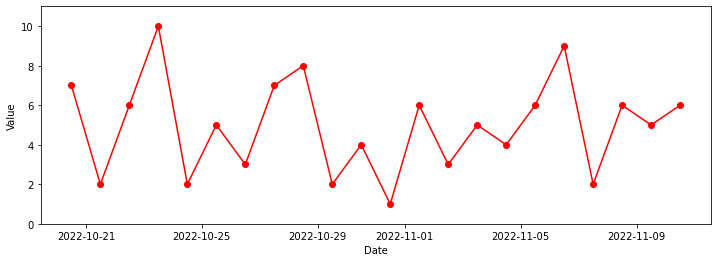

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Create two datetime objects and a vector of dates
start_time = np.datetime64('2022-10-20 12:00:00')
end_time = np.datetime64('2022-11-10 12:00:00')
time_vector = np.array(['2022-10-20', '2022-10-23', '2022-10-28'], dtype='datetime64[s]')
print(time_vector)

# Get time interval between the two times
time_elapsed = end_time - start_time
print(time_elapsed)
print(type(time_elapsed))

# Divide by the duration of 1 second to get number of seconds (as a number object)
seconds_elapsed = time_elapsed / np.timedelta64(1, 's')
print(seconds_elapsed)
print(type(time_elapsed))

# Divide by the duration of 1 day to get number of days
days_elapsed = time_elapsed / np.timedelta64(1, 'D')
print(days_elapsed)

# Create a range of datetimes spaced by 1 day
step = np.timedelta64(1, 'D')
days = np.arange(start_time, end_time + step, step)

# Plot something using days as the x-axis
fig, ax = plt.subplots(figsize=(12, 4))
value = np.random.randint(1, 11, size=len(days))
ax.plot(days, value, 'ro-')
ax.set(ylim=[0, 11], xlabel='Date', ylabel='Value')
plt.show()

---
🚩 ***Task 3a:*** Write a function `read_heartbeat_data(subject)` which takes as input an integer `subject` between 1 and 10, reads the data in `heartbeats.txt` for the given `subject`, and returns it as two NumPy vectors:

- `times`, containing the recorded times of each heartbeat (as `datetime64[s]` objects),
- `intervals`, containing the recorded intervals between heartbeats (in seconds, as `float` numbers).

**[3 marks]**

In [63]:
def read_heartbeat_data(subject):

    '''
    This function reads the data in heartbeats.txt for the given input argument,
    and returns it as two NumPy vectors.

    Input: 
    subject -> an integer between 1 and 10

    Output:

    1) times -> a NumPy vector containing the recorded times of heartbeat (as datetime64[s] objects)
    2) intervals -> a NumPy vector containing the recorded intervals between heartbeats 
       (in seconds, as float numbers).
       
    '''

    # Check that the input argument is between 1 and 10
    if (subject < 1) or (subject > 10) :
        raise ValueError('Please enter a value between 1 and 10 for subject.')

    # Check that the input argument is an integer
    if not isinstance(subject, int):
        raise TypeError('Please enter an integer value for subject.')
    
    # read the 'heartbeats.txt' file within the folder name 'subject_{}' given the input argument (subject)
    with open(f'dataset/subject_{subject}/heartbeats.txt', 'r') as myfile:
        # Initialise an empty list to store the lines
        all_lines = []

        # if line is empty, the end of file is reached 
        while True:
            # use readline to read the next line
            line = myfile.readline()[:-1]

            # Break the loop when we reach an empty line (remember Boolean casting!)
            if not line:
                break

            # Append to the list if we still have non-empty lines
            all_lines.append(line.split(','))

    # extract the recorded times for each heartbeat and store them in a list (skip the header "Time")
    times_list = [all_lines[i][1] for i in range(1,len(all_lines))]
    # convert the list into a NumPy vector with type being datetime64[s]
    times = np.array(times_list, dtype='datetime64[s]')

    # extract the recorded intervals between heartbeats and store them in a list 
    # (skip the header "Interval between heartbeats (s)")
    intervals_list = [all_lines[i][2] for i in range(1, len(all_lines))]
    # convert the list into a NumPy vector with type being float
    intervals = np.array(intervals_list, dtype='float')

    return times, intervals
    

---
🚩 ***Task 3b:*** Write a function `hr_from_intervals(intervals)` which takes as input a NumPy vector containing heartbeat interval data (such as that returned by `read_heartbeat_data()`), and returns a NumPy vector of the same length, containing the instantaneous heart rates, in **beats per minute (BPM)**, calculated from the intervals between heartbeats. You should return the heart rates as floating-point numbers.

For instance, an interval of 1 second between heartbeats should correspond to a heart rate of 60 BPM.

**[2 marks]**

In [64]:
import numpy as np
def hr_from_intervals(intervals):

    '''
    This function aims to calculate the instantaneous heart rates in beats per minute (BPM)

    Input: 
    intervals -> a NumPy vector containing heartbeat interval data

    Output:
    a NumPy vector of the same length of the input argument;
    which contains the instantaneous heart rates in beats per minute (BPM);
    the heart rates are as floating point numbers

    '''
    
    # Check that the input argument is a NumPy vector
    if (not isinstance(intervals, np.ndarray)) or (intervals.ndim != 1):
        raise TypeError('Please enter a NumPy vector for intervals.')

    # instantaneous heart rates in beats per minute (BPM) = 60/intervals between heartbeats
    heart_rate = 60/intervals

    return heart_rate 
    

---
## Task 4: Data cleaning

There are gaps and measurement errors in the heartbeat data provided by the device. These errors will likely appear as outliers in the data, which we will now try to remove.

One possible method is to remove data points which correspond to values above and below certain **percentiles** of the data. Removing the data below the $p$th percentile means removing the $p\%$ lowest values in the dataset. (Note that, for instance, the 50th percentile is the median.)

---
🚩 ***Task 4a:*** Write a function `clean_data(times_raw, hr_raw, prc_low, prc_high)` which takes 4 inputs:

- `times_raw` is the NumPy array of timestamps returned by `read_heartbeat_data()`,
- `hr_raw` is the NumPy array of computed heart rate values returned by `hr_from_intervals()`,
- `prc_low` and `prc_high` are two numbers such that $0\leq$ `prc_low` $<$ `prc_high` $\leq 100$.

Your function should return two NumPy arrays of the same length, `times` and `hr`, which are the original arrays `times_raw` and `hr_raw` where all the measurements (heart rate and associated time stamp) below the `prc_low`th percentile and above the `prc_high`th percentile of the heart rate data have been removed.

You may wish to make use of NumPy functionality to calculate percentiles.

**[4 marks]**

In [65]:
def clean_data(times_raw, hr_raw, prc_low, prc_high):

    '''
    This function aims to the data points which correspond to values above and below certain percentiles of the data

    Input:
    1) times_raw -> the NumPy array of timestamps returned by read_heartbeat_data()
    2) hr_raw -> the NumPy array of computed heart rate values returned by hr_from_intervals()
    3) prc_low and prc_high ->  two numbers such that 0 <= prc_low < prc_high <= 100

    Output:
    1) times -> a NumPy array where time below the prc_lowth percentile and above the prc_highth percentile have been removed
    2) hr -> a NumPy array where heart rate below the prc_lowth percentile and above the prc_highth percentile have been removed
    these two NumPy arrays have the same length

    '''
    
    # Check that 0 <= prc_low < prc_high <= 100
    if ((prc_low < 0) or (prc_low > 100)) or ((prc_high < 0) or (prc_high > 100)) or ((prc_low > prc_high)):
        raise ValueError('Please enter values that 0 <= prc_low < prc_high <= 100.')

    # low percentile of the heart rate data  given 'prc_low'
    low_per_hr = np.percentile(hr_raw, prc_low)
    # high percentile of the heart rate data  given 'prc_high'
    high_per_hr = np.percentile(hr_raw, prc_high)

    # heart rates below the prc_lowth percentile and above the prc_highth percentile have been removed.
    hr = [x for x in hr_raw if low_per_hr <= x <= high_per_hr]
    # find the index of data points in raw heart rate data that have been removed
    index_hr = np.where(((hr_raw > high_per_hr) | (hr_raw < low_per_hr)))

    # Note that the above code does not make time_raw and hr have the same length 
    # removes the corresponding elements for times as removed from heart rate 
    times = np.delete(times_raw, index_hr)

    # convert a list to an array
    hr = np.array(hr, dtype = 'float')

    return times, hr



---
🚩 ***Task 4b:*** Write a function `evaluate_cleaning(subject)`, which takes as input an integer `subject` between 1 and 10 indicating the subject number, and plots the following two histograms for that subject:

- a histogram of the raw heart rate data,
- a histogram of the heart rate data after cleaning with `clean_data()`, where the bottom 1% and the top 1% of the values have been removed.

Your histograms should use a logarithmic scale on the y-axis, and be clearly labelled. You should consider carefully how to lay out the histogram to best present the information.

Your function `evaluate_cleaning()` should call the functions `read_heartbeat_data()`, `hr_from_intervals()`, and `clean_data()` you wrote above, in order to obtain the raw and cleaned heart rate data for a given `subject`.

Then, use your function to display the histograms of the raw and cleaned data for Subject 3. Given that heart rates in adults can typically range from about 40 to 160 beats per minute, and given your histograms, explain why this is a suitable method to remove likely measurement errors in the heart rate data.

**[3 marks]**

---

💾 *If you are stuck on Task 3 or on the task above, you can load the data provided in the `testing` folder to produce your histograms, by running the following commands:*

```python
times_raw = np.load('testing/times_raw.npy')
hr_raw = np.load('testing/hr_raw.npy')
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

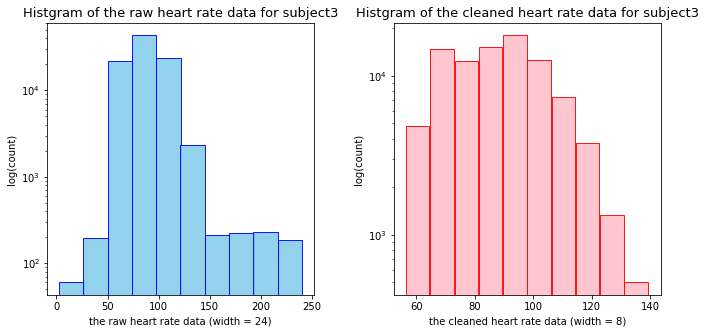

In [66]:
def evaluate_cleaning(subject):

    '''
    This function aims to plot two histgrams for a particular subject

    Input: 
    subject -> an integer between 1 and 10
    
    Output: a figure contains two subplots on one row
    1) a histogram of the raw heart rate data (with width and the subject number being specified)
    2) a histogram of the cleaned heart rate data, where the bottom 1% and the top 1% of the values have been removed
       (with width and the subject number being specified)
    '''

    # Check that the input argument is between 1 and 10
    if (subject < 1) or (subject > 10) :
        raise ValueError('Please enter a value between 1 and 10 for subject.')

    # Check that the input argument is an integer
    if not isinstance(subject, int):
        raise TypeError('Please enter an integer value for subject.')
    
    # call previous functions to obtain the raw and cleaned heart rate data
    intervals = read_heartbeat_data(subject)[1]
    times_raw = read_heartbeat_data(subject)[0]
    hr_raw = hr_from_intervals(intervals)
    # cleaned heart rate data where the bottom 1% and the top 1% of the values have been removed 
    # (pro_low = 1, pro_high = 99)
    hr_clean = clean_data(times_raw, hr_raw, 1, 99)[1]

    # draw a figure with 2 subplots on one row
    fig, ax = plt.subplots(1,2,figsize = (11,5))
    # calculate the widths for the two subplots based on the number of group being 10 
    # and round them to the nearst integer
    width_raw = round((max(hr_raw)-min(hr_raw))/10,)
    width_clean = round((max(hr_clean)-min(hr_clean))/10)

    # a histgram of raw heart rate data (set width to "width_raw" to better display the data)
    ax[0].hist(hr_raw, width = width_raw, alpha = 0.9, ec='blue', color="skyblue")
    # use a logarithmic scale on the y-axis
    ax[0].set_yscale('log')
    # add a label to the x axis (specifying the width being used for a particular subject)
    ax[0].set_xlabel(f"the raw heart rate data (width = {width_raw})")
    # add a label to the y axis
    ax[0].set_ylabel("log(count)")
    # add an appropriate title
    ax[0].set_title(f"Histgram of the raw heart rate data for subject{subject}",fontsize=13)


    # a histgram of the cleaned heart rate data (set width to "width_clean" to better display the data)
    ax[1].hist(hr_clean, width = width_clean, alpha = 0.9, ec='red', color="pink")
    # use a logarithmic scale on the y-axis
    ax[1].set_yscale('log')
    # add a label to the x axis (specifying the width being used for a particular subject)
    ax[1].set_xlabel(f"the cleaned heart rate data (width = {width_clean})")
    # add a label to the y axis
    ax[1].set_ylabel("log(count)")
    # add an appropriate title
    ax[1].set_title(f"Histgram of the cleaned heart rate data for subject{subject}",fontsize=13)

    # change the space between the two subplots
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=None, wspace = 0.3)
    plt.show()
    
evaluate_cleaning(3)


We can see that based on the histgram of raw heart rate data, there are some outliers given the fact that heart rates in adults can typically range from about 40 to 160 beats per minute. In particular, in the plot, there are heart rates being lower than 40 (down to 0) and higher than 160 BPM (up to 250). 

However after cleaning the heart rate data and plot its histgram, it is clearly to see that the heart rates are in the reasonable range (60 to 140 BPM), which means we kind of removed likely measurement errors in the heart rate data by removing the data points that are below the prc_lowth percentile and above the prc_highth percentile.

---
## Task 5: Interpolating the data

Although the device detecting heartbeats was able to measure intervals between beats with millisecond precision, the recorded timestamps could only record the second at which a heartbeat occurred. This means that there are not only time gaps in the data (due to the device missing heartbeats), but also several heartbeats usually recorded in the same second.

For example, this is an excerpt from Subject 7's data, showing a 9-second time gap between `09:19:57` and `09:20:06`, as well as 3 different heartbeats detected at `09:20:06`:

```
59,2022-07-21 09:19:56,1.033
60,2022-07-21 09:19:57,0.942
61,2022-07-21 09:20:06,0.307
62,2022-07-21 09:20:06,0.439
63,2022-07-21 09:20:06,0.297
64,2022-07-21 09:20:07,0.427
```

The goal of this next task is to **interpolate** the recorded data, in order to produce a new dataset containing values of the heart rate at regular time intervals. We will use **linear interpolation**, with the help of SciPy's `interp1d()` function (from the `interpolate` module) which we saw in Week 5.

---
🚩 ***Task 5a:*** The `interp1d()` function from SciPy can only be used with numeric data, and not timestamps. Two functions are provided for you below.

- Explain, in your own words, what both functions do and how.
- Write a few lines of test code which clearly demonstrate how the functions work.

**[2 marks]**

In [67]:
def datetime_to_seconds(times):
    return (times - times[0]) / np.timedelta64(1, 's')

def seconds_to_datetime(seconds_elapsed, start_time):
    return seconds_elapsed * np.timedelta64(1, 's') + start_time


# Demonstrating usage

####################################### datetime_to_seconds(times) #######################################

# treat the cleaned recorded time for subject 1 (with 20 and 90 being the pro_low and pro_high, respectively)
# as the input argument for simplification
times = clean_data(read_heartbeat_data(1)[0], hr_from_intervals(read_heartbeat_data(1)[1]), 20,90)[0]

# the second element of the output of datetime_to_seconds(times) is actually the difference in seconds between 
# the first two recorded times
print(datetime_to_seconds(times)[1])
print(times[0:2])

# check the type of times[1] - times[0] -> timedelta64
print(type(times[1] - times[0]))

# check the type of the returned value to see that it has been converted to a float
print(type(datetime_to_seconds(times)[1]))

############################# seconds_to_datetime(seconds_elapsed, start_time) #############################

# say that we set the second_elpased to be 2, and the start_time to be '2022-07-22 14:10:16'
seconds_elapsed = 2
start_time = np.datetime64('2022-07-22 14:10:16', 's')

# check the type of seconds_elapsed * np.timedelta64(1, 's') -> timedelta64, which can complement datetime64
print(type(seconds_elapsed * np.timedelta64(1, 's')))

# the returned value of seconds_to_datetime(seconds_elapsed, start_time) is actually the time after the 
# second_elapsed being added to the start time
print(seconds_to_datetime(seconds_elapsed, start_time))

# check the type of the returned value to see that it is again a datetime64[s]
print(type(seconds_to_datetime(seconds_elapsed, start_time)))


2.0
['2022-07-22T10:03:20' '2022-07-22T10:03:22']
<class 'numpy.timedelta64'>
<class 'numpy.float64'>
<class 'numpy.timedelta64'>
2022-07-22T14:10:18
<class 'numpy.datetime64'>


datetime_to_seconds():
- basically takes as input an NumPy array with data type being datetime64;
- calculate the seconds relative to the first element (start time) in the input array to get differences 
  in seconds as data type timedelta64;
- convert these differences into float via dividing them by np.timedelta64(1, 's')
- returns a NumPy array with data type being float

seconds_to_datetime()
- basically takes as input an NumPy array/ a single value with data type being float/intger (second_elapsed) 
  and a start time as datetime64;
- obtaiin the datetime relative to the start time after the 'second_elapsed' being added by first converting the float/integer
  into timedelta64, then adding it to the start time;
- returns a NumPy array/ a single value with data type being datetime64

---
🚩 ***Task 5b:*** Write a function `generate_interpolated_hr(times, hr, time_delta)` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object representing a time interval in seconds,

and returns two new NumPy vectors, `times_interp` and `hr_interp`, such that:

- `times_interp` contains regularly spaced `datetime64[s]` timestamps, starting at `times[0]`, ending on or less than `time_delta` seconds before `times[-1]`, and with an interval of `time_delta` between consecutive times.
- `hr_interp` contains the heart rate data obtained using **linear interpolation** and evaluated at each time in `times_interp`, for example with the help of the `interp1d()` function from `scipy.interpolate`.

For example, if `times` starts at `10:20:00` and ends at `10:20:09` with a `time_delta` of two seconds, then your `times_interp` vector should contain `10:20:00`, `10:20:02`, `10:20:04`, `10:20:06`, `10:20:08`, and `hr_interp` should consist of the corresponding interpolated heart rate values at each of those times.

**[4 marks]**

In [68]:
from scipy.interpolate import interp1d

def generate_interpolated_hr(times, hr, time_delta):

    '''
    This function aims to interpolate the recorded data by using linear interpolation, in order to 
    produce a new dataset containing values of the heart rate at regular time intervals 

    Input:
    1) times, hr -> two NumPy vectors such as those returned by clean_data()
    2) time_delta -> a timedelta64[s] object representing a time interval in seconds

    Output:
    1) times_interp -> a NumPy vector contains regularly spaced datetime64[s] timestamps, starting at times[0], 
       ending on or less than time_delta seconds before times[-1], and with an interval of time_delta between consecutive times
    2) hr_interp -> a NumPy vector contains the heart rate data obtained using linear interpolation and evaluated at 
       each time in times_interp
       
    '''

    # check the type of 'time_delta'
    if not isinstance(time_delta, np.timedelta64):
        raise TypeError('Please enter a timesdelta64[s] object for time_delta.')

    # create a NumPy vector of regularly spaced datetime64[s] timestamps, given starting and ending points, 
    # the step is also provided
    times_interp = np.arange(times[0], times[-1], time_delta, dtype='datetime64[s]')

    # convert datetime64 to float since interp1d() from SciPy can only be used with numeric data, and not timestamps
    seconds_times = datetime_to_seconds(times)
    seconds_time_interp = datetime_to_seconds(times_interp)

    # allow us to linearly interpolate within the domain of the data
    f = interp1d(seconds_times, hr, kind = "linear")
    # based on the linear interpolation and given regularly spaced timestamps, calculate the interpolated
    # heart rate data
    hr_interp = f(seconds_time_interp)

    return times_interp, hr_interp
    

---
🚩 ***Task 5c:*** Check your `generate_interpolated_hr()` function by generating interpolated heart rate data for Subject 1 for just the first 100 measurements (after cleaning). You should generate interpolated data with a time interval of 5 seconds. Plot the data points, as well as your interpolated data, and discuss in the Markdown cell below whether your plot is what you expected, and why.

**[2 marks]**

---
💾 *If you are stuck on Task 4, you can use the cleaned data provided in the `testing` folder to check your code, by running the following commands:*

```python
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

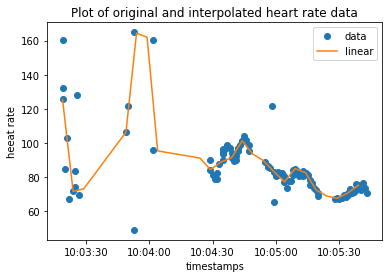

In [69]:
time_delta = np.timedelta64(5, "s")

# for Subject 1 for just the first 100 measurements (after cleaning)
times = clean_data(read_heartbeat_data(1)[0], hr_from_intervals(read_heartbeat_data(1)[1]), 1,99)[0][0:100]
hr = clean_data(read_heartbeat_data(1)[0], hr_from_intervals(read_heartbeat_data(1)[1]), 1,99)[1][0:100]

# generate interpolated heart rate data
times_interp = generate_interpolated_hr(times, hr, time_delta)[0]
hr_interp = generate_interpolated_hr(times, hr, time_delta)[1]

# plot the data points, as well as the interpolated data
plt.plot(times, hr, 'o', times_interp, hr_interp, '-')
plt.legend(['data', 'linear'], loc='best')
plt.title("Plot of original and interpolated heart rate data")
plt.ylabel("heart rate")
plt.xlabel("timestamps")
plt.show()

We can see that the interpolated heart rate data captures the whole trend in the original cleaned heart rate data in general with a few extreme data points being missed.

The reason why is that the case may consider that the time interval chosen is relatively large (5s), and other kinds of interpolation (cubic, quadratic) may perform better.

---
## Task 6: Smoothing the data with a rolling average

A rolling average is simply an average of the heart rate data, calculated over a given window of time. For example:

- The 20-second rolling average of the heart rate at a time `10:20:00` is the average heart rate over the 20 seconds leading up to that time, i.e. the average of all the heart rates between `10:19:41` and `10:20:00` (inclusive). If we have measurements of the heart rate every 5 seconds, then this would be the average of the heart rates measured at `10:19:45`, `10:19:50`, `10:19:55`, and `10:20:00`.
- We can similarly calculate the 20-second rolling average at the next measurement time, `10:20:05`, as the average heart rate over the 20-second period from `10:19:46` to `10:20:05` (inclusive).

The rolling average essentially smoothes out the sudden jumps in the measured (or interpolated) heart rate data, allowing us to see the longer-term variations more clearly.

---
🚩 ***Task 6:*** Write a function `rolling_average()` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object `time_delta` representing a time interval in seconds,
- a `timedelta64[s]` object `window`, representing the window duration in seconds (with `window` assumed to be an integer multiple of `time_delta`),

and returns a NumPy vector `hr_rolling` containing values for the rolling average of the heart rate over time, with the given window size.

Your `rolling_average()` function should call `generate_interpolated_hr()` to generate regularly-spaced heart rate data with a time interval `time_delta`, before computing and returning the averaged heart rate data.

Note that `hr_rolling` will be shorter than the length of your interpolated heart rate data, because you can only start computing rolling averages after one window of time has elapsed. (For instance, if your data starts at `10:20:00`, with a 30-second window, the first value of the rolling average you can obtain is at `10:20:29`.)

**[4 marks]**

In [70]:
def rolling_average(times, hr, time_delta, window):
    
    '''
    This function aims to calculate the rolling average of the heart rate data, which is simply calculated 
    over a given window of time.

    Input:
    1) times and hr -> two NumPy vectors such as those returned by clean_data()
    2) time_delta -> a timedelta64[s] object representing a time interval in seconds
    3) window -> a timedelta64[s] object representing the window duration in seconds 

    Output:
    hr_rolling -> a NumPy vector containing values for the rolling average of the heart rate over time, 
                  with the given window size

    '''

    # check the type of 'time_delta' for both time_delta and window
    if not isinstance(time_delta, np.timedelta64):
        raise TypeError('Please enter a timesdelta64[s] object for time_delta.')

    if not isinstance(window, np.timedelta64):
        raise TypeError('Please enter a timesdelta64[s] object for window.')

    # check if window is an integer multiple of time_delta
    if (window % time_delta != 0):
        raise ValueError('Please make sure window is an integer multiple of time_delta')
    
    # generate regularly-spaced timestamps and heart rate data
    times_interp = generate_interpolated_hr(times, hr, time_delta)[0]
    hr_interp = generate_interpolated_hr(times, hr, time_delta)[1]
    
    # the number of elements needed to be sumed for calculating the rolling average 
    n_sum = window/time_delta

    # initilize the index of the first element of heart rate data to be calculated its rolling average
    rol_index = window/time_delta
    # initialize an empty list to store rolling averages
    hr_rolling = []
    
    # loop until the last item in 'times_interp'
    while rol_index < (len(times_interp) + 1):
    
        # calculate the average of current window by summing over the items before it
        window_average = sum(hr_interp[int(rol_index-n_sum+1):int(rol_index+1)]) * (1 / n_sum)
        
        # store the average of current window 
        hr_rolling.append(window_average)
        
        # shift window to right by one position via changing the rolling index
        rol_index += 1

    # convert list to array
    hr_rolling = np.array(hr_rolling)

    return hr_rolling



---
## Task 7: Putting it all together

You should now have a series of functions which allow you to:

- read data on measured heartbeart-to-heartbeat intervals for a given subject,
- transform this data into heart rate measurements and clean out the outliers,
- interpolate the data to generate measurements at regular time intervals,
- compute a rolling average of the heart rate data over time, to smooth out the data.

For each subject, there is another file `actigraph.txt`, containing activity data recorded by a separate device. In particular, this data provides another independent measurement of the subjects' heart rate. We can use this to check our work.

---
🚩 ***Task 7:*** Write a function `display_heart_rate(subject)` which takes as input an integer `subject` between 1 and 10, and produces one single graph, containing two plots on the same set of axes:

- a plot of the heart rate data found in `actigraph.txt` over time,
- a plot of the smoothed heart rate data computed by you from the data in `heartbeats.txt`, using interpolated measurements of the heart rate every 3 seconds, and a 30-second window size for the averaging.

Your plot should show good agreement between the two sets of data. Instead of showing the full 24 hours of data, you should choose a period of time over which to plot the heart rate (say, approximately 1 hour), in order to better visualise the results.

Show an example by using your function to display the results for 3 subjects of your choice.

**[4 marks]**

---
💾 *If you are stuck on Task 5 or 6, you can use the actigraph heart rate data provided in the `testing` folder in `actigraph.txt`, and compare this to the smoothed heart rate data provided in the `testing` folder, which you can load by running the following command:*

```python
hr_rolling = np.load('testing/hr_rolling.npy')
```

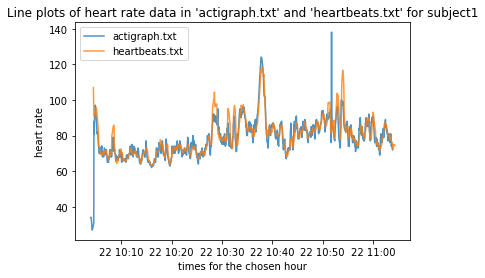

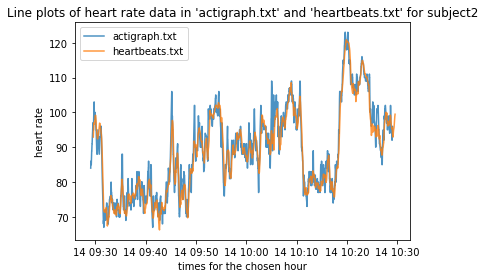

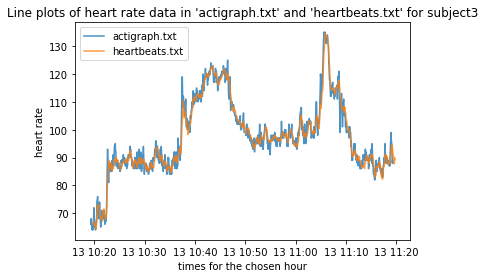

In [128]:
def display_heart_rate(subject):
    
    '''
    This function aims to check whether the smoothed heart rate data (from heartbeats.txt) computed by linear 
    interpolation and rolling average agrees with the heart rate measured by independent measurement (from actigraph.txt)

    Input: 
    subject -> an integer between 1 and 10

    Output:
    one single graph, containing two plots on the same set of axes:
    1) a plot of the heart rate data found in actigraph.txt over time
    2) a plot of the smoothed heart rate data computed by you from the data in heartbeats.txt, 
       using interpolated measurements of the heart rate every 3 seconds, and a 30-second window size for the averaging
       
    '''
    # Check that the input argument is between 1 and 10
    if (subject < 1) or (subject > 10) :
        raise ValueError('Please enter a value between 1 and 10 for subject.')

    # Check that the input argument is an integer
    if not isinstance(subject, int):
        raise TypeError('Please enter an integer value for subject.')

    # read the 'actigraph.txt' file within the folder name 'subject_{}' given the input argument (subject)
    with open(f'dataset/subject_{subject}/actigraph.txt', 'r') as myfile:
        # Initialise an empty list to store the lines
        all_lines = []

        # if line is empty, the end of file is reached 
        while True:
            # use readline to read the next line
            line = myfile.readline()[:-1]

            # Break the loop when we reach an empty line (remember Boolean casting!)
            if not line:
                break

            # Append to the list if we still have non-empty lines
            all_lines.append(line.split(','))

    # extract the recorded times for each heartbeat and store them in a list (skip the header "Time")
    times_list = [all_lines[i][1] for i in range(1,len(all_lines))]
    # convert the list into a NumPy vector with type being datetime64[s]
    times_ac = np.array(times_list, dtype='datetime64[s]')

    # extract the recorded heartbeats and store them in a list (skip the header Heart rate (BPM)")
    hr_list = [all_lines[i][2] for i in range(1, len(all_lines))]
    # convert the list into a NumPy vector with type being float
    hr_ac = np.array(hr_list, dtype='float')

    # calculate the smoothed heart rate data
    time_delta = np.timedelta64(3, "s")
    times_hb = clean_data(read_heartbeat_data(subject)[0], hr_from_intervals(read_heartbeat_data(subject)[1]), 1,99)[0]
    hr_hb = clean_data(read_heartbeat_data(subject)[0], hr_from_intervals(read_heartbeat_data(subject)[1]), 1,99)[1]
    window = np.timedelta64(30, "s")
    # evenly-spaced timestamps
    times_interp = generate_interpolated_hr(times_hb, hr_hb, time_delta)[0]
    # smoothed heart rate data
    smooth_hr = rolling_average(times_hb, hr_hb, time_delta, window)

    # choose a period of time over which to plot the heart rate (1 hour), in order to better visualise the results
    # randomly choose a start point for recorded times and make sure it will used for both txt files
    index_p = 16
    # find the corresponding staring time with index being 16 for times, and both files start from this time
    start = times_ac[index_p]
    # add one hour on top of that starting time as the ending time for both files
    end = start + np.timedelta64(1, 'h')

    # find the index of the one hour of times
    index_ac = np.where((start <= times_ac) & (times_ac <= end))
    index_hb = np.where((start <= times_interp) & (times_interp <= end))

    ############################# for the heat rate data in 'actigraph.txt' file #############################
    # find the corresponding peroid of one hour of times 
    times_ac = times_ac[index_ac]
    # find the corresponding heart rate points for this hour 
    hr_ac = hr_ac[index_ac]

    ############################# for the heat rate data in 'heartbeats.txt' file #############################
    # find the moothed heart rate data for an hour
    smooth_hr = smooth_hr[index_hb]

    # convert array to list
    times_interp = times_interp.tolist()
    # delete the begining data of evenly-spaced times (for calculating the first rolling average)
    del times_interp[0: int(window/time_delta)]
    # convert list to array
    time_hh = np.array(times_interp)
    # find the corresponding peroid of one hour of times 
    time_hh= time_hh[index_hb]

    # plot the data points, as well as the interpolated data
    plt.plot(times_ac, hr_ac, '-', time_hh, smooth_hr, '-', alpha = 0.8)
    plt.legend(['actigraph.txt', 'heartbeats.txt'], loc='best')
    plt.title(f"Line plots of heart rate data in 'actigraph.txt' and 'heartbeats.txt' for subject{subject}")
    plt.ylabel("heart rate")
    plt.xlabel("times for the chosen hour")
    plt.show()

display_heart_rate(1)
display_heart_rate(2)
display_heart_rate(3)

---
## Task 8: relating to other data

The data in `actigraph.txt` also contains the following columns:

- `Steps` indicates the number of steps detected per second (using a pedometer).
- `Inclinometer Standing`/`Sitting`/`Lying` indicates the position of the subject, automatically detected by the device.
- `Inclinometer Off` indicates when the device didn't record a position.

In particular, the `Inclinometer ...` columns record either `0` or `1`, and they are mutually exclusive over each row. This means that, for example, a subject can't be recorded simultaneously sitting and standing.

---
🚩 ***Task 8:*** Using the results of your data processing work in previous tasks, can you relate some of this additional data (and/or some of the data in `subject_info.txt`) to the heart rate estimates that you have obtained?

You are free to choose how you complete this task. You will be assessed on the correctness of your code and analysis, the quality of your code (readability, commenting/documentation, structure), and the presentation of your results.

Note that you do not have to use **all** of the extra data to obtain full marks.

**[5 marks]**

---
💾 *If you are using `hr_rolling.npy` and the actigraph data in the `testing` folder, this is the information for this person:*

| Weight | Height | Age |
|:-:|:-:|:-:|
| 85 | 180 | 27 |